In [1]:
# Importing the libraries

import cv2 as cv              
import numpy as np
import os
import matplotlib.pyplot as plt



In [2]:

# Importing the dataset

datadir = '/Downloads/dataset/'  # data directory where the files are stored
categories = ['road_accidents','natural_disaster','fire_accidents'] #reading the category of data in files

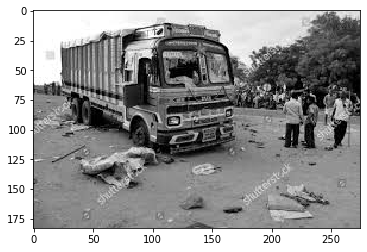

In [3]:
for ctg in categories:
    path = os.path.join(datadir,ctg)  #joining both directory and category
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE) #reading the image in gray scale
        plt.imshow(img_array,cmap='gray') #to show the image
        plt.show()
        break
    break

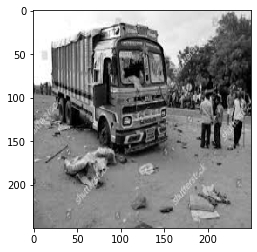

In [4]:
img_size = 250  #   slecting the image size 
new_array = cv.resize(img_array,(img_size,img_size))  #resizing the image into new array
plt.imshow(new_array,cmap = 'gray')   
plt.show()

In [5]:
training_data = []   #creating the epmty list for tarining data
def creating_training_data():
    for ctg in categories:
        path = os.path.join(datadir,ctg)   #joining the path of direcory and root
        class_num = categories.index(ctg)  #providing the label to the data
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)  # reading the image into gray scale
                img_size = 250
                new_array = cv.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num]) # appending the image  into training data with label and feature
            except Exception as e:
                pass
            
            
creating_training_data()    

In [6]:
print(len(training_data))    # total number of images in file

1791


In [7]:
import random                  
random.shuffle(training_data)      # shuffling all the data

In [8]:
for sample in training_data[:10]:   # checkinng all the labels in image data
    print(sample[1])

2
2
2
2
0
0
2
2
0
0


In [9]:
x = []     #creating an empty list for feature
y = []     #creating an empty list for labels


In [10]:
for features, lables in training_data:   
    x.append(features)    #appending all the features in x list
    y.append(lables)      #appending all the labels in y list
    
x = np.array(x).reshape(-1,img_size, img_size, 1)     # resizing the features in 4d tensor
x = x/255.0                                           #scaling the features (converting all the pixel number between 0 and 1)
x.shape

(1791, 250, 250, 1)

In [11]:
y = np.asarray(y)      # converting the list lables into numpy array
y = y.reshape(len(y),-1)  # resizing the lables into two dimension
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Importing the library to convert lables in 3d tensor
labelencoder_X = LabelEncoder()    
y[:, 0] = labelencoder_X.fit_transform(y[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])  # transform the 1d vector into 3d tensor
y = onehotencoder.fit_transform(y).toarray()
y.shape

/home/pankaj/anaconda3/envs/tenserflow/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/pankaj/anaconda3/envs/tenserflow/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(1791, 3)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [13]:
# Importing all libraries for CNN-Model

from keras.models  import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.
/home/pankaj/anaconda3/envs/tenserflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pankaj/anaconda3/envs/tenserflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pankaj/anaconda3/envs/tenserflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pa

In [14]:
classifier = Sequential()

classifier.add(Convolution2D(64,(3,3),activation = 'relu', input_shape = x.shape[1:]))

In [15]:
classifier.add(MaxPooling2D(pool_size = (2,2) ))


classifier.add(Convolution2D(64,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2) ))
classifier.add( Dropout (.2))

classifier.add(Convolution2D(64,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2) ))
classifier.add( Dropout (.2))

classifier.add(Convolution2D(64,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2) ))
classifier.add( Dropout (.2))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:

classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Dense(3, activation = 'softmax'))



In [17]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
classifier.fit(X_train, y_train, batch_size = 10, validation_split = .15, epochs = 10, shuffle = True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1019 samples, validate on 180 samples
Epoch 1/10
1019/1019 [==============================] - 85s 84ms/step - loss: 0.8664 - acc: 0.6163 - val_loss: 0.6278 - val_acc: 0.7722
Epoch 2/10
1019/1019 [==============================] - 81s 80ms/step - loss: 0.6949 - acc: 0.7301 - val_loss: 0.5567 - val_acc: 0.8222
Epoch 3/10
1019/1019 [==============================] - 81s 80ms/step - loss: 0.6160 - acc: 0.7831 - val_loss: 0.5887 - val_acc: 0.7722
Epoch 4/10
1019/1019 [==============================] - 82s 81ms/step - loss: 0.5307 - acc: 0.8067 - val_loss: 0.5167 - val_acc: 0.8333
Epoch 5/10
1019/1019 [==============================] - 80s 79ms/step - loss: 0.4871 - acc: 0.8175 - val_loss: 0.5640 - val_acc: 0.7944
Epoch 6/10
1019/1019 [==============================] - 81s 79ms/step - loss: 0.4133 - acc: 0.8351 - val_loss: 0.4777 - val_acc: 0.8278
Epoch 7/10
1019/1019 [=====================

In [19]:

classifier.save('/home/pankaj/Downloads/dataset.h5')
from keras.models import load_model


classifier =  load_model('/home/pankaj/Downloads/dataset.h5')
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 64)        0         
__________

In [20]:
score = classifier.evaluate(X_test,y_test, verbose = 0)
print('test_loss', score[0])
print('accuracy', score[1])

test_loss 0.40026646530306015
accuracy 0.8733108108108109


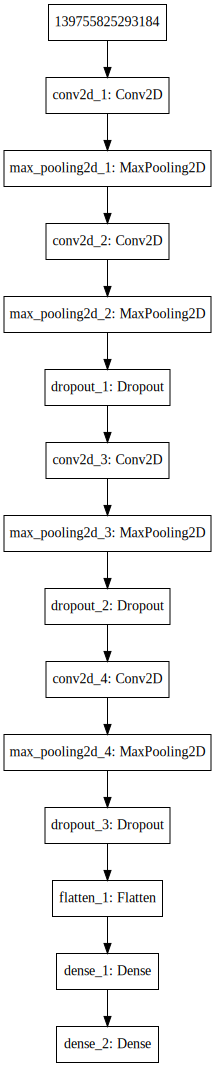

In [29]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(classifier).create(prog='dot', format='svg'))

[[2.4359059e-04 1.2333833e-02 9.8742259e-01]]
[2]


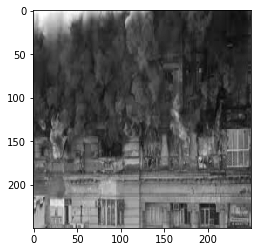

In [23]:

plt.imshow(X_test[0].reshape(img_size,img_size), cmap= 'gray')
test_images = X_test[0:1]
print(classifier.predict(test_images))
print(classifier.predict_classes(test_images))

In [1]:
'''datadir = '/home/pankaj/Downloads/dataset/'  #reading the directory
categories = ['test_image'] #reading the category of data'''

"datadir = '/Downloads/dataset/'  #reading the directory\ncategories = ['test_image'] #reading the category of data"

In [2]:
'''trainig_data = []   #creating the epmty list for tarining data
def creating_training_data():
    for ctg in categories:
        path = os.path.join(datadir,ctg) #joining the path of direcory and root
        class_num = categories.index(ctg)  #providing the label to the data
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)  # reading the image into gray scale
                img_size = 250
                new_array = cv.resize(img_array,(img_size,img_size))
                trainig_data.append([new_array,class_num]) # appending the image  into training data with label and feature
            except Exception as e:
                pass
            
            
creating_training_data()'''

'trainig_data = []   #creating the epmty list for tarining data\ndef creating_training_data():\n    for ctg in categories:\n        path = os.path.join(datadir,ctg) #joining the path of direcory and root\n        class_num = categories.index(ctg)  #providing the label to the data\n        for img in os.listdir(path):\n            try:\n                img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)  # reading the image into gray scale\n                img_size = 250\n                new_array = cv.resize(img_array,(img_size,img_size))\n                trainig_data.append([new_array,class_num]) # appending the image  into training data with label and feature\n            except Exception as e:\n                pass\n            \n            \ncreating_training_data()'

In [3]:
'''x = []
y = []

for features, lables in trainig_data:
    x.append(features)
    y.append(lables)
    
x = np.array(x).reshape(-1,img_size, img_size, 1)
x = x/255.0'''


'x = []\ny = []\n\nfor features, lables in trainig_data:\n    x.append(features)\n    y.append(lables)\n    \nx = np.array(x).reshape(-1,img_size, img_size, 1)\nx = x/255.0'

In [4]:
'''#x = x.reshape(img_size,img_size,1)
#x.shape
for i in range(10):
    
    print(np.argmax(classifier.predict(x[i].reshape(-1,img_size,img_size,1))))'''

'#x = x.reshape(img_size,img_size,1)\n#x.shape\nfor i in range(10):\n    \n    print(np.argmax(classifier.predict(x[i].reshape(-1,img_size,img_size,1))))'

In [5]:
'''for i in range(len(trainig_data)):
    d = x[i]
    d.shape = (img_size,img_size)
    plt.imshow(d, cmap = 'gray')
    print(np.argmax(classifier.predict(x[i].reshape(-1,img_size,img_size,1))))
    plt.show()'''


"for i in range(len(trainig_data)):\n    d = x[i]\n    d.shape = (img_size,img_size)\n    plt.imshow(d, cmap = 'gray')\n    print(np.argmax(classifier.predict(x[i].reshape(-1,img_size,img_size,1))))\n    plt.show()"